In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

today = ''.join(str(datetime.date(datetime.today())).split('-'))
with open (f'logs/20220807', encoding='UTF8') as f:
    records = [line.rstrip().split(' ') for line in f]
columns = ['date', 'time', 'campus', 'building', 'floor', 'token', 'trash_type', 'rfid', 'amount']
df = pd.DataFrame(records, columns=columns)



In [34]:
df.campus

0       서울대학교
1       서울대학교
2       연세대학교
3       서울대학교
4       연세대학교
        ...  
9995    서울대학교
9996    연세대학교
9997    연세대학교
9998    연세대학교
9999    서울대학교
Name: campus, Length: 10000, dtype: object

In [92]:
snu = df.campus == "서울대학교"

In [93]:
df.groupby(['token']).count()

,date,time,campus,building,floor,trash_type,rfid,amount,hour
token,,,,,,,,,
114GLA29,1119,1119,1119,1119,1119,1119,1119,1119,1119
11B2PPR10,1063,1063,1063,1063,1063,1063,1063,1063,1063
13B1GER61,1148,1148,1148,1148,1148,1148,1148,1148,1148
144PET117,1071,1071,1071,1071,1071,1071,1071,1071,1071
14B1GLA94,1156,1156,1156,1156,1156,1156,1156,1156,1156
152GLA139,1096,1096,1096,1096,1096,1096,1096,1096,1096
154GER146,1119,1119,1119,1119,1119,1119,1119,1119,1119
213PPR175,1119,1119,1119,1119,1119,1119,1119,1119,1119
224GLA209,1109,1109,1109,1109,1109,1109,1109,1109,1109


In [97]:
df.sort_values(by=["token", "time"])

,date,time,campus,building,floor,token,trash_type,rfid,amount,hour
7249,2022/08/07,00:00:04,서울대학교,공학관,4,114GLA29,CAN,0000000263,0.4229516702131252,00
1476,2022/08/07,00:02:47,서울대학교,공학관,4,114GLA29,CAN,0000004598,0.06054571731093683,00
1189,2022/08/07,00:03:02,서울대학교,공학관,4,114GLA29,CAN,0000004267,0.05922851977797439,00
1817,2022/08/07,00:06:40,서울대학교,공학관,4,114GLA29,CAN,0000003954,0.7026807785895123,00
259,2022/08/07,00:08:05,서울대학교,공학관,4,114GLA29,CAN,0000003052,0.49425422082613524,00
...,...,...,...,...,...,...,...,...,...,...
546,2022/08/07,23:53:44,연세대학교,어학관,4,224GLA209,GLA,0000004877,0.46696187882343987,23
6365,2022/08/07,23:53:49,연세대학교,어학관,4,224GLA209,GLA,0000004565,0.7248661192463678,23
8553,2022/08/07,23:56:04,연세대학교,어학관,4,224GLA209,GLA,0000000570,0.029984830670626517,23
908,2022/08/07,23:56:48,연세대학교,어학관,4,224GLA209,GLA,0000003901,0.48572654773679025,23


In [101]:
table = df.groupby(["token"]).time

In [150]:
table = df.groupby(["token", "date", "hour"]).date.count()

In [153]:
table

token      date        hour
114GLA29   2022/08/07  00      36
                       01      61
                       02      43
                       03      58
                       04      43
                               ..
224GLA209  2022/08/07  19      48
                       20      41
                       21      47
                       22      49
                       23      48
Name: date, Length: 216, dtype: int64

In [128]:
table2 = df.groupby(["campus", "building", "floor", "date", "hour"]).date.count()

In [129]:
table2

campus  building  floor  date        hour
서울대학교   경영대학관     B1     2022/08/07  00      39
                                     01      40
                                     02      54
                                     03      41
                                     04      52
                                             ..
연세대학교   어학관       4      2022/08/07  19      48
                                     20      41
                                     21      47
                                     22      49
                                     23      48
Name: date, Length: 216, dtype: int64

In [140]:
table3 = df.groupby(["campus", "trash_type"]).date.count()

In [139]:
table4 = df.groupby(["campus", "building", "trash_type"]).date.count()

<AxesSubplot:ylabel='date'>

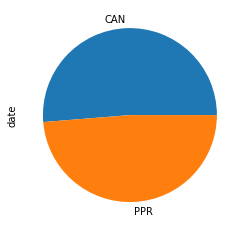

In [149]:
table4.loc["서울대학교"].loc["공학관"].plot.pie()

In [141]:
table3= table3.loc["서울대학교"]


<AxesSubplot:ylabel='date'>

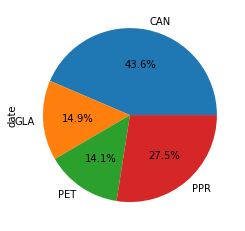

In [155]:
table3.plot.pie(autopct='%0.1f%%')

In [118]:
table

token      date        hour
114GLA29   2022/08/07  00      36
                       01      61
                       02      43
                       03      58
                       04      43
                               ..
224GLA209  2022/08/07  19      48
                       20      41
                       21      47
                       22      49
                       23      48
Name: date, Length: 216, dtype: int64

In [113]:
import matplotlib.pyplot as plt

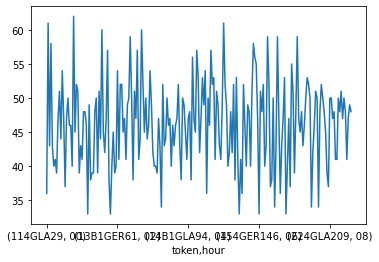

In [116]:
table.plot()
plt.show()